<b>Machine Learning Exercise session: 07 October 2025</b>

# <b>Working with: Decision Trees</b>

Welcome to this week's exercise session. Today, we will learn about _Decision Trees_ (DT). This notebook will take you through:
- Translating intuition into practice
    - Setting decision boundaries
    - Calculating Impurities
    - How does the tree grow deeper
- Building Decision Tree classifiers from scratch, and using libraries
- Plotting decision boundaries, and showing explainability
- How features and hyperparameters can impact performance

The exercises are structured in 3 sections (Theory **T**; Application **A**; Exploration **E**). Optionally, here is a table to guide you through this sheet:

|To do|Exercise|
|----|--|
|First|T0-3, A0-2|
|Then|T4, A3-4|
|Last|E0-3|

Remember 
- It is good practice to use the Machine Learning python environment you made in *Week 1*.
- Solving these exercises is supposed to take longer than 90 minutes. Work on them before going to class.
- Learning Machine Learning is challenging. Take your time, make some errors, and read the documentation if needed. **We are happy to help if you are stuck**.
- *None of the exercises are mandatory, do your best to solve them! Every weekend solutions will be published!*
- *Remember to provide feedback on this Exercise sheet on the LearnIT page of the course so we can make better exercise sessions in the future!*

**Have fun!** 

# <b>Exploring theoretical background</b>

You are tasked to help MumboJumbo, a well known Minecraft player and content creator, to set up a machine that places torches which can adapt to any environment, using some clever machine learning techniques to decide when to place a torch.

In Minecraft, torches are a way to prevent enemies from spawning nearby (i.e. being loaded into the game-world). They appear in dark areas, either when it's night time or if a cave is nearby.

MumboJumbo scouted the world that you will be working in, and has given you some information that you can use to work with, as seen below. Equipped with your newly obtained knowledge from the Decision Tree lecture, you are prepared to take on this task.

# Exercise T0

Drawing **decision boundaries** by "hand":

Below you are given a dataset with 2 features and two classes:
- The distance to a cave
- The overall light level of that area
- Whether the area is worth placing a torch in, or not

You are also given a plot of this dataset, now:
1. Save the image locally on your machine, or use the DT_Image.png image file
2. Using any image editing application or website, draw a line splititting the plot using a single decision boundary with only 1 of the features
3. Save your new image containing the decision boundary, you will be using it later

<div style="display: flex; align-items: flex-start; gap: 20px;">
    <div><table>
      <tr><th>Distance to cave</th><th>Light level</th><th>Place torch</th></tr>
      <tr><td>0</td><td>2</td><td>0</td></tr>
      <tr><td>9</td><td>5</td><td>0</td></tr>
      <tr><td>6</td><td>8</td><td>1</td></tr>
      <tr><td>3</td><td>10</td><td>0</td></tr>
      <tr><td>12</td><td>13</td><td>1</td></tr>
    </table></div>
    <div><img src="DT_Image.png" alt="Example image" width="400"></div>
</div>


# Exercise T1


Computing the **Gini Impurity** or **Entropy**:

Given the dataset from the previous exerecise, and your carefully chosen decision boundary
1. For both regions, calculate their Gini Impurity or Entropy
2. Calculate the overall quality of the split using their weighted average or by calculating the Information gain

**It is recommended that you do the calculations here for ease of use in the future, but you can do it on paper if you so choose.**

**The equations for the required calculations can be found in the lecture slides**

In [24]:
import numpy as np

print("Splitting by 'Distance to cave' <= 4.5\n")

# Define the dataset from T0
data_t1 = {
    'Distance to cave': [0, 9, 6, 3, 12],
    'Light level': [2, 5, 8, 10, 13],
    'Place torch': [0, 0, 1, 0, 1]
}

# Choose a decision boundary: Distance to cave <= 4.5
threshold = 4.5
feature = 'Distance to cave'

# Split the data
left_classes = []
right_classes = []

for i in range(len(data_t1['Distance to cave'])):
    if data_t1['Distance to cave'][i] <= threshold:
        left_classes.append(data_t1['Place torch'][i])
    else:
        right_classes.append(data_t1['Place torch'][i])

left_classes = np.array(left_classes)
right_classes = np.array(right_classes)
all_classes = np.array(data_t1['Place torch'])

# Function to calculate Gini Impurity
def calc_gini(classes):
    if len(classes) == 0:
        return 0.0
    unique, counts = np.unique(classes, return_counts=True)
    probabilities = counts / len(classes)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

# Function to calculate Entropy
def calc_entropy(classes):
    if len(classes) == 0:
        return 0.0
    unique, counts = np.unique(classes, return_counts=True)
    probabilities = counts / len(classes)
    # Avoid log(0) by adding small epsilon
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

# Calculate Gini for each region
gini_left = calc_gini(left_classes)
gini_right = calc_gini(right_classes)
gini_parent = calc_gini(all_classes)

print(f"Parent Gini = {gini_parent:.4f}")
print(f"Left Gini = {gini_left:.4f}")
print(f"Right Gini = {gini_right:.4f}")

# Weighted Gini
n_left = len(left_classes)
n_right = len(right_classes)
n_total = len(all_classes)

weighted_gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
info_gain_gini = gini_parent - weighted_gini

print(f"Weighted Gini Impurity: {weighted_gini:.4f}")
print(f"Information Gain (Gini): {info_gain_gini:.4f}\n")

# Calculate Entropy for each region
entropy_left = calc_entropy(left_classes)
entropy_right = calc_entropy(right_classes)
entropy_parent = calc_entropy(all_classes)

print(f"Parent Entropy = {entropy_parent:.4f}")
print(f"Left Entropy = {entropy_left:.4f}")
print(f"Right Entropy = {entropy_right:.4f}")

# Weighted Entropy
weighted_entropy = (n_left / n_total) * entropy_left + (n_right / n_total) * entropy_right
info_gain_entropy = entropy_parent - weighted_entropy

print(f"Weighted Entropy: {weighted_entropy:.4f}")
print(f"Information Gain (Entropy): {info_gain_entropy:.4f}\n")

Splitting by 'Distance to cave' <= 4.5

Parent Gini = 0.4800
Left Gini = 0.0000
Right Gini = 0.4444
Weighted Gini Impurity: 0.2667
Information Gain (Gini): 0.2133

Parent Entropy = 0.9710
Left Entropy = -0.0000
Right Entropy = 0.9183
Weighted Entropy: 0.5510
Information Gain (Entropy): 0.4200



# Exercise T2

Now doing it **again**, going deeper:

Given the previous dataset and the image you have split:
1. Draw a second decision boundary using the other feature
2. Save the image
3. Calculate each regions Gini Impurity or Entropy
4. Calculate the overall quality of the split using their weighted average or by calculating the Information gain

Do you believe you will obtain better results in the end using more splits?

In [23]:
print("Splitting by 'Light level' <= 6.5\n")

# The right region from T1 contains these points
right_region_data = {
    'Distance to cave': [9, 6, 12],
    'Light level': [5, 8, 13],
    'Place torch': [0, 1, 1]
}

# Choose second split: Light level <= 6.5 (between 5 and 8)
threshold2 = 6.5
feature2 = 'Light level'

# Split the right region
region_2a_classes = []  # Light <= 6.5
region_2b_classes = []  # Light > 6.5

for i in range(len(right_region_data['Light level'])):
    if right_region_data['Light level'][i] <= threshold2:
        region_2a_classes.append(right_region_data['Place torch'][i])
    else:
        region_2b_classes.append(right_region_data['Place torch'][i])

region_2a_classes = np.array(region_2a_classes)
region_2b_classes = np.array(region_2b_classes)
right_region_classes = np.array(right_region_data['Place torch'])

# Calculate impurities
gini_2a = calc_gini(region_2a_classes)
gini_2b = calc_gini(region_2b_classes)
gini_right_before = calc_gini(right_region_classes)

print("Gini calculations:")
print(f"Before the second split (right region only): Gini = {gini_right_before:.4f}")
print(f"Region 2a (Light <= {threshold2}): Gini = {gini_2a:.4f}")
print(f"Region 2b (Light > {threshold2}): Gini = {gini_2b:.4f}")

# Weighted Gini for second split
n_2a = len(region_2a_classes)
n_2b = len(region_2b_classes)
n_right_total = len(right_region_classes)

weighted_gini_2 = (n_2a / n_right_total) * gini_2a + (n_2b / n_right_total) * gini_2b
info_gain_gini_2 = gini_right_before - weighted_gini_2

print(f"Weighted Gini for second split: {weighted_gini_2:.4f}")
print(f"Information Gain from second split: {info_gain_gini_2:.4f}")

# Calculate Entropy
entropy_2a = calc_entropy(region_2a_classes)
entropy_2b = calc_entropy(region_2b_classes)
entropy_right_before = calc_entropy(right_region_classes)

print("\nEntropy calculations:")
print(f"Right region before split: {entropy_right_before:.4f}")
print(f"Region 2a: {entropy_2a:.4f}")
print(f"Region 2b: {entropy_2b:.4f}")

weighted_entropy_2 = (n_2a / n_right_total) * entropy_2a + (n_2b / n_right_total) * entropy_2b
info_gain_entropy_2 = entropy_right_before - weighted_entropy_2

print(f"Weighted Entropy: {weighted_entropy_2:.4f}")
print(f"Information Gain: {info_gain_entropy_2:.4f}")

# Overall weighted impurity (across all 5 samples)
overall_gini = (2/5) * 0.0 + (1/5) * 0.0 + (2/5) * 0.0
print(f"\nOverall weighted Gini impurity: {overall_gini:.4f}")

Splitting by 'Light level' <= 6.5

Gini calculations:
Before the second split (right region only): Gini = 0.4444
Region 2a (Light <= 6.5): Gini = 0.0000
Region 2b (Light > 6.5): Gini = 0.0000
Weighted Gini for second split: 0.0000
Information Gain from second split: 0.4444

Entropy calculations:
Right region before split: 0.9183
Region 2a: -0.0000
Region 2b: -0.0000
Weighted Entropy: -0.0000
Information Gain: 0.9183

Overall weighted Gini impurity: 0.0000


# Exercise T3

Making a **change**:

Given the previous dataset and the image you have split twice now:
1. Move any of the decision boundaries by some amount so that at least 1 data point falls into a new region
2. Calculate their impurity, using any of the two methods, and then the overall quality of the split

Has it made any meaningful difference?

In [25]:
import numpy as np

print("Splitting by 'Distance to cave' <= 4.5\n")

# Define the dataset from T0
data_t1 = {
    'Distance to cave': [0, 9, 6, 3, 12],
    'Light level': [2, 5, 8, 10, 13],
    'Place torch': [0, 0, 1, 0, 1]
}

# Choose a decision boundary: Distance to cave <= 6.5
threshold = 6.5
feature = 'Distance to cave'

# Split the data
left_classes = []
right_classes = []

for i in range(len(data_t1['Distance to cave'])):
    if data_t1['Distance to cave'][i] <= threshold:
        left_classes.append(data_t1['Place torch'][i])
    else:
        right_classes.append(data_t1['Place torch'][i])

left_classes = np.array(left_classes)
right_classes = np.array(right_classes)
all_classes = np.array(data_t1['Place torch'])

# Function to calculate Gini Impurity
def calc_gini(classes):
    if len(classes) == 0:
        return 0.0
    unique, counts = np.unique(classes, return_counts=True)
    probabilities = counts / len(classes)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

# Function to calculate Entropy
def calc_entropy(classes):
    if len(classes) == 0:
        return 0.0
    unique, counts = np.unique(classes, return_counts=True)
    probabilities = counts / len(classes)
    # Avoid log(0) by adding small epsilon
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

# Calculate Gini for each region
gini_left = calc_gini(left_classes)
gini_right = calc_gini(right_classes)
gini_parent = calc_gini(all_classes)

print(f"Parent Gini = {gini_parent:.4f}")
print(f"Left Gini = {gini_left:.4f}")
print(f"Right Gini = {gini_right:.4f}")

# Weighted Gini
n_left = len(left_classes)
n_right = len(right_classes)
n_total = len(all_classes)

weighted_gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
info_gain_gini = gini_parent - weighted_gini

print(f"Weighted Gini Impurity: {weighted_gini:.4f}")
print(f"Information Gain (Gini): {info_gain_gini:.4f}\n")

# Calculate Entropy for each region
entropy_left = calc_entropy(left_classes)
entropy_right = calc_entropy(right_classes)
entropy_parent = calc_entropy(all_classes)

print(f"Parent Entropy = {entropy_parent:.4f}")
print(f"Left Entropy = {entropy_left:.4f}")
print(f"Right Entropy = {entropy_right:.4f}")

# Weighted Entropy
weighted_entropy = (n_left / n_total) * entropy_left + (n_right / n_total) * entropy_right
info_gain_entropy = entropy_parent - weighted_entropy

print(f"Weighted Entropy: {weighted_entropy:.4f}")
print(f"Information Gain (Entropy): {info_gain_entropy:.4f}\n")

Splitting by 'Distance to cave' <= 4.5

Parent Gini = 0.4800
Left Gini = 0.4444
Right Gini = 0.5000
Weighted Gini Impurity: 0.4667
Information Gain (Gini): 0.0133

Parent Entropy = 0.9710
Left Entropy = 0.9183
Right Entropy = 1.0000
Weighted Entropy: 0.9510
Information Gain (Entropy): 0.0200



# Exercise T4

Discuss in pairs:

- Is two splits enough, too much, or too little? Why?
- What would happen if there is no stopping condition?

# <b>Applying what you learned</b>

Now that you got some intuition of what results you are expecting from the above exercises, it is time to implement your very own Decision Tree classifier and see if it matches your intuition!

### **Documentation**

Some of the libraries that is expected to be used moving forward:
- numpy : https://numpy.org/doc/stable/index
- pandas : https://pandas.pydata.org/pandas-docs/stable/
- matplotlib.pyplot : https://matplotlib.org/stable/tutorials/pyplot.html
- scipy.stats : https://docs.scipy.org/doc/scipy/tutorial/stats.html
- sklearn : https://sklearn.org/stable/getting_started.html
  - datasets : https://scikit-learn.org/stable/api/sklearn.datasets.html
  - tree : https://scikit-learn.org/stable/api/sklearn.tree
  - model_selection : https://sklearn.org/stable/api/sklearn.model_selection.html
  - metrics : https://scikit-learn.org/stable/api/sklearn.metrics.html

**It is recommended that you have these pages available for you to read at any moment, rather than scrolling up and down all the time. In a real working environment your hand wont be held, and you will be responsible to find the relevant documentation.**

# Exercise A0

The first step is to **start simple**

To make things easy moving on, implement a few relevant functions for a given regions data points:
- Implement a function for calculating Gini Impurity or Entropy
- Implement a function for calculating the Weighted Impurity or Information Gain

Don't be worried if you have to come back and modify these functions later on as we expand on the difficulty of tasks.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate Gini Impurity
def gini_impurity(labels):
    """
    Calculate Gini Impurity for a set of labels.
    Gini = 1 - sum(p_i^2) where p_i is the proportion of class i
    """
    if len(labels) == 0:
        return 0
    
    # Count occurrences of each class
    unique_classes, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    
    # Calculate Gini Impurity
    gini = 1 - np.sum(probabilities ** 2)
    return gini

# Function to calculate Entropy
def entropy(labels):
    """
    Calculate Entropy for a set of labels.
    Entropy = -sum(p_i * log2(p_i)) where p_i is the proportion of class i
    """
    if len(labels) == 0:
        return 0
    
    # Count occurrences of each class
    unique_classes, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    
    # Calculate Entropy (avoid log(0))
    entropy_value = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy_value

# Function to calculate Weighted Impurity
def weighted_impurity(left_labels, right_labels, impurity_func=gini_impurity):
    """
    Calculate weighted impurity for a split.
    Weighted Impurity = (n_left/n_total) * impurity_left + (n_right/n_total) * impurity_right
    """
    n_left = len(left_labels)
    n_right = len(right_labels)
    n_total = n_left + n_right
    
    if n_total == 0:
        return 0
    
    # Calculate weighted average of impurities
    weighted_imp = (n_left / n_total) * impurity_func(left_labels) + \
                   (n_right / n_total) * impurity_func(right_labels)
    return weighted_imp

# Function to calculate Information Gain
def information_gain(parent_labels, left_labels, right_labels, impurity_func=gini_impurity):
    """
    Calculate Information Gain for a split.
    Information Gain = parent_impurity - weighted_child_impurity
    """
    parent_impurity = impurity_func(parent_labels)
    child_impurity = weighted_impurity(left_labels, right_labels, impurity_func)
    
    info_gain = parent_impurity - child_impurity
    return info_gain

# Test the functions with a simple example
test_labels = np.array([0, 0, 1, 1, 1])
print(f"Test labels: {test_labels}")
print(f"Gini Impurity: {gini_impurity(test_labels):.4f}")
print(f"Entropy: {entropy(test_labels):.4f}")

# Test weighted impurity
left = np.array([0, 0])
right = np.array([1, 1, 1])
print(f"\nLeft: {left}, Right: {right}")
print(f"Weighted Gini: {weighted_impurity(left, right, gini_impurity):.4f}")
print(f"Information Gain (Gini): {information_gain(test_labels, left, right, gini_impurity):.4f}")

Test labels: [0 0 1 1 1]
Gini Impurity: 0.4800
Entropy: 0.9710

Left: [0 0], Right: [1 1 1]
Weighted Gini: 0.0000
Information Gain (Gini): 0.4800


# Exercise A1

Your first **Decision Tree** from scratch

It is time to find the first decision boundary:
- Using loops, iterate over the dataset, taking in count one feature at each loop
- Calculate the impurity at each step
- Save the best split considering which feature gave the best results and at which datapoint, minimizing impurity
- Plot the dataset with the split. *(You may want to add this as a function to the block above to have things neatly organized once the tasks get more complex)*

Remember that the Decision Tree model first evaluates the best split given each feature, before any further splits are made.

Does it match your initial drawing from T0, and your intuition? Feel free to discuss in pairs.

Dataset:
   Distance to cave  Light level  Place torch
0                 0            2            0
1                 9            5            0
2                 6            8            1
3                 3           10            0
4                12           13            1

Feature: Distance to cave
  Best threshold: 4.50
  Weighted Gini Impurity: 0.2667

Feature: Light level
  Best threshold: 6.50
  Weighted Gini Impurity: 0.2667

Best split: Distance to cave <= 4.50
Best weighted impurity: 0.2667


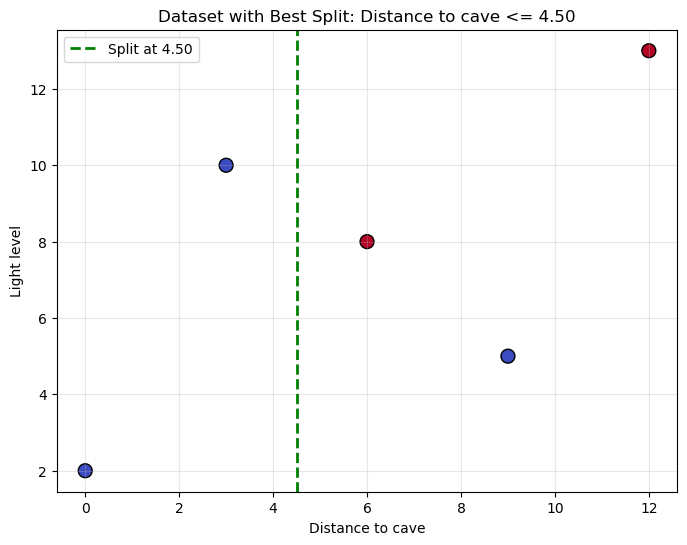

In [28]:
# Define the dataset from Exercise T0
data = {
    'Distance to cave': [0, 9, 6, 3, 12],
    'Light level': [2, 5, 8, 10, 13],
    'Place torch': [0, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
X = df[['Distance to cave', 'Light level']].values
y = df['Place torch'].values

print("Dataset:")
print(df)
print()

# Function to find best split for a single feature
def find_best_split_feature(X_col, y, feature_name):
    """Find the best split for a single feature"""
    best_threshold = None
    best_impurity = float('inf')
    best_left_indices = None
    best_right_indices = None
    
    # Try all possible split points (between consecutive unique values)
    unique_values = np.sort(np.unique(X_col))
    
    for i in range(len(unique_values) - 1):
        threshold = (unique_values[i] + unique_values[i + 1]) / 2
        
        # Split data
        left_indices = X_col <= threshold
        right_indices = X_col > threshold
        
        left_labels = y[left_indices]
        right_labels = y[right_indices]
        
        # Calculate weighted impurity
        w_impurity = weighted_impurity(left_labels, right_labels, gini_impurity)
        
        if w_impurity < best_impurity:
            best_impurity = w_impurity
            best_threshold = threshold
            best_left_indices = left_indices
            best_right_indices = right_indices
    
    return best_threshold, best_impurity, best_left_indices, best_right_indices

# Find best split across all features
feature_names = ['Distance to cave', 'Light level']
best_feature = None
best_threshold = None
best_impurity = float('inf')

for i, feature_name in enumerate(feature_names):
    threshold, impurity, left_idx, right_idx = find_best_split_feature(X[:, i], y, feature_name)
    
    print(f"Feature: {feature_name}")
    print(f"  Best threshold: {threshold:.2f}")
    print(f"  Weighted Gini Impurity: {impurity:.4f}")
    print()
    
    if impurity < best_impurity:
        best_impurity = impurity
        best_feature = i
        best_threshold = threshold
        best_feature_name = feature_name

print(f"Best split: {best_feature_name} <= {best_threshold:.2f}")
print(f"Best weighted impurity: {best_impurity:.4f}")

# Plot the dataset with the best split
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)
plt.xlabel('Distance to cave')
plt.ylabel('Light level')
plt.title(f'Dataset with Best Split: {best_feature_name} <= {best_threshold:.2f}')

# Draw the decision boundary
if best_feature == 0:  # Split on Distance to cave
    plt.axvline(x=best_threshold, color='green', linestyle='--', linewidth=2, label=f'Split at {best_threshold:.2f}')
else:  # Split on Light level
    plt.axhline(y=best_threshold, color='green', linestyle='--', linewidth=2, label=f'Split at {best_threshold:.2f}')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Exercise A2

Going one **depth** lower

Now that one split is made, it is time to create the second split:
- Using loops again, iterate over the each region made from the split, taking in count all features.
- Calculate the impurity at each step
- Save the best split
- Plot the dataset with the two splits

Remember that the split happens per region, so it has to be calculated for both regions, and for all features.

Left region best split: Distance to cave <= 1.50
  Weighted Gini Impurity: 0.0000

Right region best split: Light level <= 6.50
  Weighted Gini Impurity: 0.0000



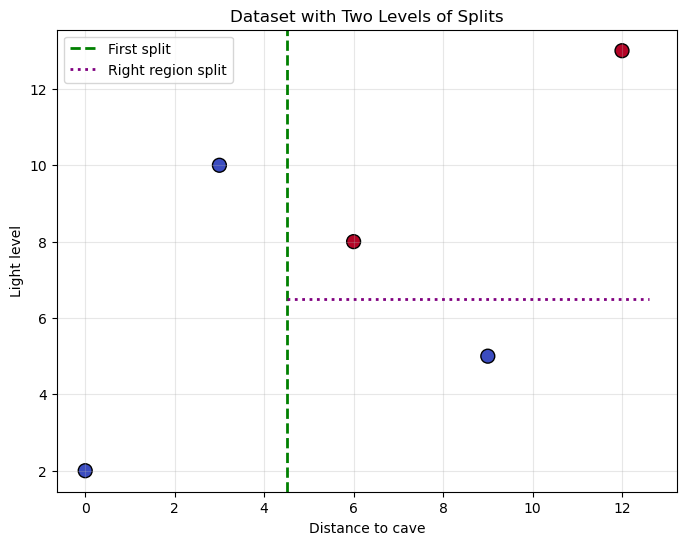

In [29]:
# Use the first split from A1 to create regions
first_split_feature = best_feature
first_split_threshold = best_threshold

# Split data into two regions
if first_split_feature == 0:  # Split on Distance to cave
    left_region_mask = X[:, 0] <= first_split_threshold
    right_region_mask = X[:, 0] > first_split_threshold
else:  # Split on Light level
    left_region_mask = X[:, 1] <= first_split_threshold
    right_region_mask = X[:, 1] > first_split_threshold

# Get data for each region
X_left = X[left_region_mask]
y_left = y[left_region_mask]
X_right = X[right_region_mask]
y_right = y[right_region_mask]

# Function to find best split for a region, same as before
def find_best_split_region(X_region, y_region, feature_names):
    """Find the best split for a specific region"""
    if len(y_region) <= 1:
        return None, None, float('inf'), None, None
    
    best_threshold = None
    best_impurity = float('inf')
    best_feature = None
    best_left_indices = None
    best_right_indices = None
    
    for i, feature_name in enumerate(feature_names):
        X_col = X_region[:, i]
        unique_values = np.sort(np.unique(X_col))
        
        if len(unique_values) < 2:
            continue
        
        for j in range(len(unique_values) - 1):
            threshold = (unique_values[j] + unique_values[j + 1]) / 2
            
            left_indices = X_col <= threshold
            right_indices = X_col > threshold
            
            left_labels = y_region[left_indices]
            right_labels = y_region[right_indices]
            
            w_impurity = weighted_impurity(left_labels, right_labels, gini_impurity)
            
            if w_impurity < best_impurity:
                best_impurity = w_impurity
                best_threshold = threshold
                best_feature = i
                best_left_indices = left_indices
                best_right_indices = right_indices
    
    return best_feature, best_threshold, best_impurity, best_left_indices, best_right_indices

# Find best split for left region
left_feature, left_threshold, left_impurity, _, _ = find_best_split_region(X_left, y_left, feature_names)
if left_feature is not None:
    print(f"Left region best split: {feature_names[left_feature]} <= {left_threshold:.2f}")
    print(f"  Weighted Gini Impurity: {left_impurity:.4f}")
else:
    print("Left region: No further split needed (already pure or too small)")
print()

# Find best split for right region
right_feature, right_threshold, right_impurity, _, _ = find_best_split_region(X_right, y_right, feature_names)
if right_feature is not None:
    print(f"Right region best split: {feature_names[right_feature]} <= {right_threshold:.2f}")
    print(f"  Weighted Gini Impurity: {right_impurity:.4f}")
else:
    print("Right region: No further split needed (already pure or too small)")
print()

# Plot the dataset with both splits
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)
plt.xlabel('Distance to cave')
plt.ylabel('Light level')
plt.title('Dataset with Two Levels of Splits')

# Get plot limits
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

# Draw the first split
if first_split_feature == 0:
    plt.axvline(x=first_split_threshold, color='green', linestyle='--', linewidth=2, label='First split')
else:
    plt.axhline(y=first_split_threshold, color='green', linestyle='--', linewidth=2, label='First split')

# Only draw the second split for right region (the useful one)
if right_feature is not None:
    if right_feature == 0:  # Distance to cave
        if first_split_feature == 0:
            # Vertical line in right region (x > first_split_threshold)
            plt.plot([right_threshold, right_threshold], [y_min, y_max], 
                    color='purple', linestyle=':', linewidth=2, label='Right region split')
        else:
            # Horizontal split was first, so right region is where y > first_split_threshold
            plt.plot([right_threshold, right_threshold], [first_split_threshold, y_max], 
                    color='purple', linestyle=':', linewidth=2, label='Right region split')
    else:  # Light level
        if first_split_feature == 0:
            # Vertical split was first, so right region is where x > first_split_threshold
            plt.plot([first_split_threshold, x_max], [right_threshold, right_threshold], 
                    color='purple', linestyle=':', linewidth=2, label='Right region split')
        else:
            # Horizontal line in right region
            plt.axhline(y=right_threshold, color='purple', linestyle=':', linewidth=2, label='Right region split')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Exercise A3

Time to **scale up**

Now that you have the foundation on how to split a dataset and calculate impurity, it is time to implement a Decision Tree classifier on a larger dataset using the corresponding libraies:
- Load the dataset into memory from the code block provided below and inspect the plot created
- Split the dataset into training and validation sets
- Using Feature1 and Feature2 columns as your features, with the Label column as your label, train a Decision Tree classifier
- Evaluate the result and performance of your classifier
- Plot the corresponding decision boundary.


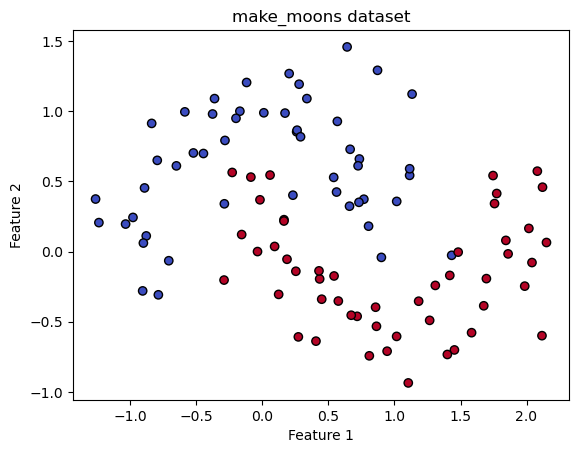

In [30]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("make_moons dataset")
plt.show()

Dataset shape: (100, 2)
Classes: [0 1]

Training Accuracy: 1.0000
Validation Accuracy: 0.9500

Confusion Matrix (Validation):
[[10  0]
 [ 1  9]]

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



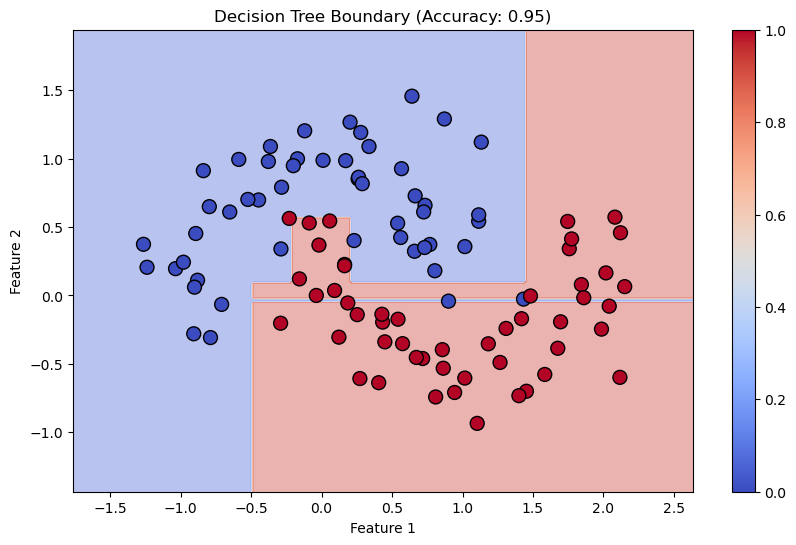

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset (already created in the cell above)
print("Dataset shape:", X.shape)
print("Classes:", np.unique(y))
print()

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_train_pred = dt_classifier.predict(X_train)
y_val_pred = dt_classifier.predict(X_val)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred))

# Plot decision boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    """Plot the decision boundary of a classifier"""
    # Create a mesh
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, dt_classifier, 
                      title=f"Decision Tree Boundary (Accuracy: {val_accuracy:.2f})")

# Exercise A4

Back to **scratch**

Instead of using the library implementation, it is time to put all your knowledge to test and code a Decision Tree classifier from scratch on the make_moons dataset.

You are already equipped with the knowledge of how the data is loaded, how the splits are made, and how you can evaluate the performance of models (from past lectures).

For this exercise, you will be focusing on developing a recursive tree builder, so that your your splits are automatically made until a stopping condition is met.

Your tasks are:
- Load the dataset
- Implement a recursive tree builder with nodes, which in essence has:
    - An node object that holds information about what feature it is split on, the treshold, what its left and right children are, and what its label is
    - A function that recursively splits the dataset and builds these nodes, until a stopping condition is met (e.g. until a region is pure or a certain depth is reached)
- Run the tree builder on the training dataset
- Test it on the validation dataset
- Plot the results and evaluate it. How closely does it match the library implementation?

Training Accuracy: 1.0000
Validation Accuracy: 0.9500

Confusion Matrix (Validation):
[[10  0]
 [ 1  9]]

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

From-scratch validation accuracy: 0.9500
sklearn validation accuracy: 0.9500
Difference: 0.0000


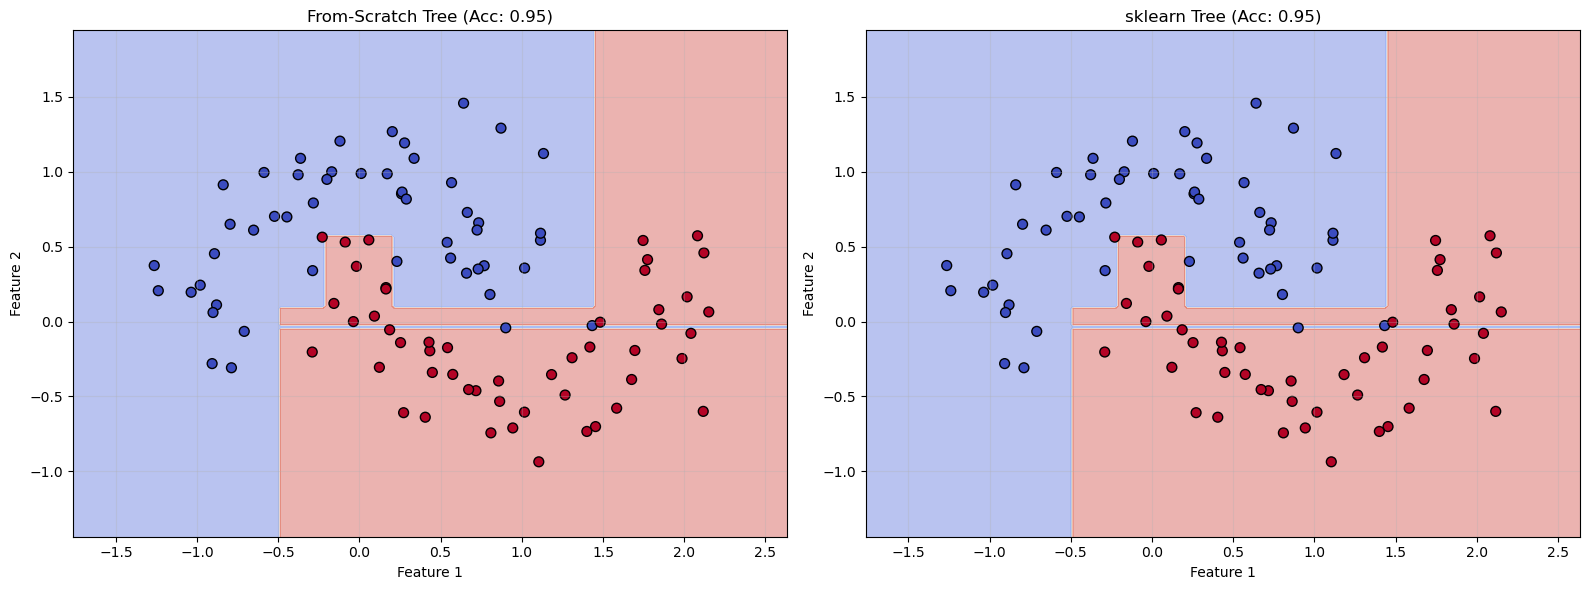

In [40]:
# Split the dataset into training and validation sets
X_train_scratch, X_val_scratch, y_train_scratch, y_val_scratch = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a Node class to represent each node in the decision tree
class Node:
    """
    A node in the decision tree.
    """
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature        # Index of feature to split on
        self.threshold = threshold    # Threshold value for the split
        self.left = left              # Left child node
        self.right = right            # Right child node
        self.value = value            # Class label for leaf nodes
    
    def is_leaf(self):
        """Check if the node is a leaf node"""
        return self.value is not None


# Define the Decision Tree Classifier class
class DecisionTreeFromScratch:
    """
    A Decision Tree classifier built from scratch.
    """
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
    
    def fit(self, X, y):
        """Build the decision tree"""
        self.root = self._build_tree(X, y, depth=0)
        return self
    
    def _build_tree(self, X, y, depth):
        """
        Recursively build the decision tree.
        """
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        # Stopping conditions
        if (self.max_depth is not None and depth >= self.max_depth) or \
           n_classes == 1 or \
           n_samples < self.min_samples_split:
            # Create a leaf node with the most common class
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        
        # Find the best split
        best_feature, best_threshold = self._best_split(X, y)
        
        # If no split improves the tree, create a leaf node
        if best_feature is None:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        
        # Split the dataset
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold
        
        # Recursively build left and right subtrees
        left_child = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        
        return Node(feature=best_feature, threshold=best_threshold, 
                   left=left_child, right=right_child)
    
    def _best_split(self, X, y):
        """
        Find the best split for the dataset.
        """
        n_samples, n_features = X.shape
        
        if n_samples <= 1:
            return None, None
        
        best_gini = float('inf')
        best_feature = None
        best_threshold = None
        
        # Try all features
        for feature_idx in range(n_features):
            X_col = X[:, feature_idx]
            thresholds = np.unique(X_col)
            
            # Try all possible thresholds
            for i in range(len(thresholds) - 1):
                threshold = (thresholds[i] + thresholds[i + 1]) / 2
                
                # Split the data
                left_indices = X_col <= threshold
                right_indices = X_col > threshold
                
                left_y = y[left_indices]
                right_y = y[right_indices]
                
                # Calculate weighted Gini impurity
                w_gini = weighted_impurity(left_y, right_y, gini_impurity)
                
                # Update best split if this is better
                if w_gini < best_gini:
                    best_gini = w_gini
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold
    
    def _most_common_label(self, y):
        """Return the most common label in y"""
        unique, counts = np.unique(y, return_counts=True)
        return unique[np.argmax(counts)]
    
    def predict(self, X):
        """Predict class labels for samples in X"""
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        """
        Traverse the tree to make a prediction for a single sample.
        """
        # If we're at a leaf node, return its value
        if node.is_leaf():
            return node.value
        
        # Otherwise, traverse left or right based on the feature value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

dt_scratch = DecisionTreeFromScratch(max_depth=10, min_samples_split=2)
dt_scratch.fit(X_train_scratch, y_train_scratch)

# Make predictions
y_train_pred_scratch = dt_scratch.predict(X_train_scratch)
y_val_pred_scratch = dt_scratch.predict(X_val_scratch)

# Evaluate the classifier
train_accuracy_scratch = accuracy_score(y_train_scratch, y_train_pred_scratch)
val_accuracy_scratch = accuracy_score(y_val_scratch, y_val_pred_scratch)

print(f"Training Accuracy: {train_accuracy_scratch:.4f}")
print(f"Validation Accuracy: {val_accuracy_scratch:.4f}")
print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_val_scratch, y_val_pred_scratch))
print("\nClassification Report (Validation):")
print(classification_report(y_val_scratch, y_val_pred_scratch))


print(f"From-scratch validation accuracy: {val_accuracy_scratch:.4f}")
print(f"sklearn validation accuracy: {val_accuracy:.4f}")
print(f"Difference: {abs(val_accuracy_scratch - val_accuracy):.4f}")

# Plot decision boundaries side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot from-scratch tree
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# From-scratch predictions
Z_scratch = dt_scratch.predict(np.c_[xx.ravel(), yy.ravel()])
Z_scratch = Z_scratch.reshape(xx.shape)

axes[0].contourf(xx, yy, Z_scratch, alpha=0.4, cmap='coolwarm')
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title(f'From-Scratch Tree (Acc: {val_accuracy_scratch:.2f})')
axes[0].grid(True, alpha=0.3)

# sklearn predictions
Z_sklearn = dt_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)

axes[1].contourf(xx, yy, Z_sklearn, alpha=0.4, cmap='coolwarm')
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title(f'sklearn Tree (Acc: {val_accuracy:.2f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# <b>Exploring what you learned</b>

# Exercise E0

Showcasing explainability:
- Use export_text and plot_tree to extract and show a simple viauslization of the classifier

Using the Decision Tree classifier from Exercise A3
Tree depth: 5
Number of leaves: 9

TREE RULES (Text Representation)
|--- Feature 2 <= 0.10
|   |--- Feature 1 <= -0.50
|   |   |--- class: 0
|   |--- Feature 1 >  -0.50
|   |   |--- Feature 2 <= -0.05
|   |   |   |--- class: 1
|   |   |--- Feature 2 >  -0.05
|   |   |   |--- Feature 2 <= -0.02
|   |   |   |   |--- class: 0
|   |   |   |--- Feature 2 >  -0.02
|   |   |   |   |--- class: 1
|--- Feature 2 >  0.10
|   |--- Feature 1 <= 1.44
|   |   |--- Feature 2 <= 0.57
|   |   |   |--- Feature 1 <= 0.20
|   |   |   |   |--- Feature 1 <= -0.22
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Feature 1 >  -0.22
|   |   |   |   |   |--- class: 1
|   |   |   |--- Feature 1 >  0.20
|   |   |   |   |--- class: 0
|   |   |--- Feature 2 >  0.57
|   |   |   |--- class: 0
|   |--- Feature 1 >  1.44
|   |   |--- class: 1


TREE STRUCTURE (Visual Representation)


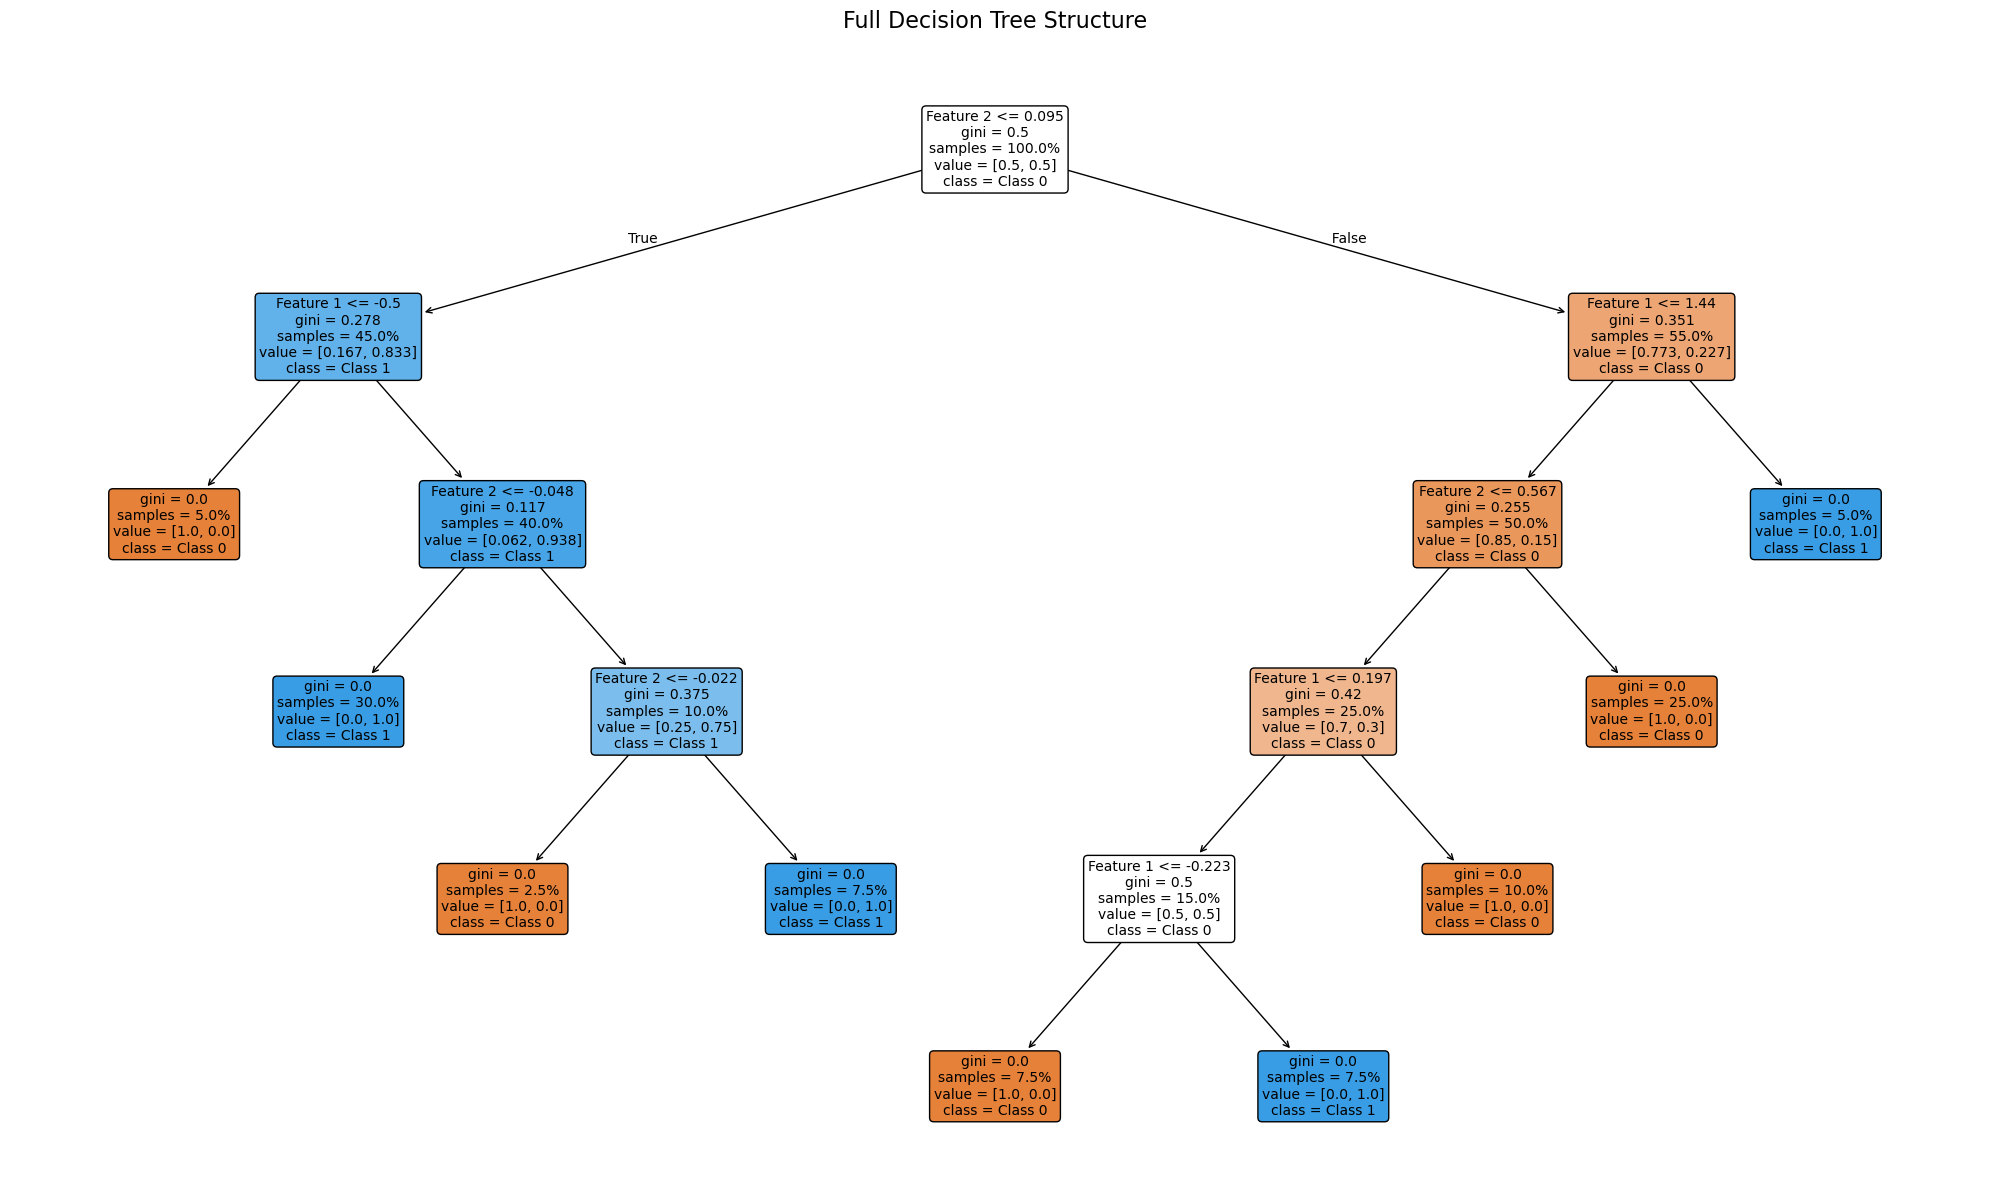

In [46]:
from sklearn.tree import export_text, plot_tree

# Use the Decision Tree trained in A3
print("Using the Decision Tree classifier from Exercise A3")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")
print()

# 1. Export tree as text rules
print("TREE RULES (Text Representation)")
tree_rules = export_text(dt_classifier, feature_names=['Feature 1', 'Feature 2'])
print(tree_rules)

# 2. Visualize the tree structure
print("\nTREE STRUCTURE (Visual Representation)")

plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, 
         feature_names=['Feature 1', 'Feature 2'],
         class_names=['Class 0', 'Class 1'],
         filled=True,
         rounded=True,
         fontsize=10,
         proportion=True)
plt.title('Full Decision Tree Structure', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Exercise E1

Checking some properties of Decision Trees:
- Show that Decision Trees are invariant to monotonic feature scaling
- Verify the same splits before/after StandardScaler/MinMaxScaler

**Note**: scaling affects plotting but not split order.

Original data range:
Feature 0: [-1.466, 2.688]
Feature 1: [-0.765, 1.469]

After StandardScaler:
Feature 0: [-2.120, 2.333]
Feature 1: [-1.871, 2.286]

After MinMaxScaler:
Feature 0: [0.000, 1.000]
Feature 1: [0.000, 1.000]

Decision Trees are invariant to monotonic feature scaling.



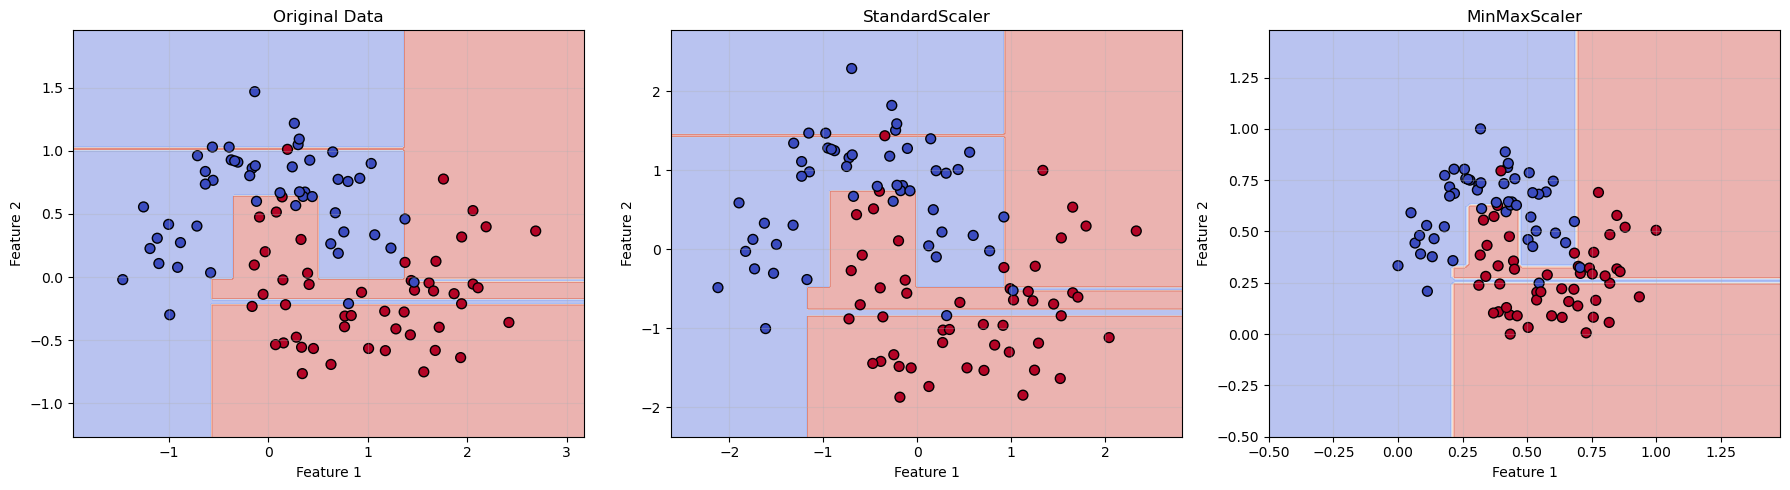

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Generate a fresh dataset for this exercise
X_scaling, y_scaling = make_moons(n_samples=100, noise=0.25, random_state=42)

print("Original data range:")
print(f"Feature 0: [{X_scaling[:, 0].min():.3f}, {X_scaling[:, 0].max():.3f}]")
print(f"Feature 1: [{X_scaling[:, 1].min():.3f}, {X_scaling[:, 1].max():.3f}]")
print()

# Apply StandardScaler
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X_scaling)

print("After StandardScaler:")
print(f"Feature 0: [{X_standard[:, 0].min():.3f}, {X_standard[:, 0].max():.3f}]")
print(f"Feature 1: [{X_standard[:, 1].min():.3f}, {X_standard[:, 1].max():.3f}]")
print()

# Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X_scaling)

print("After MinMaxScaler:")
print(f"Feature 0: [{X_minmax[:, 0].min():.3f}, {X_minmax[:, 0].max():.3f}]")
print(f"Feature 1: [{X_minmax[:, 1].min():.3f}, {X_minmax[:, 1].max():.3f}]")
print()

# Train Decision Trees on each version
dt_original = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_standard = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_minmax = DecisionTreeClassifier(random_state=42, max_depth=5)

dt_original.fit(X_scaling, y_scaling)
dt_standard.fit(X_standard, y_scaling)
dt_minmax.fit(X_minmax, y_scaling)

# Extract the split features and order
def get_split_sequence(tree, max_nodes=10):
    """Extract the sequence of splits from a decision tree"""
    splits = []
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    
    for i in range(min(len(feature), max_nodes)):
        if feature[i] != -2:  # -2 indicates a leaf node
            splits.append((i, feature[i], threshold[i]))
    return splits

splits_original = get_split_sequence(dt_original)
splits_standard = get_split_sequence(dt_standard)
splits_minmax = get_split_sequence(dt_minmax)

# Compare feature order (should be identical)
features_original = [f for _, f, _ in splits_original[:5]]
features_standard = [f for _, f, _ in splits_standard[:5]]
features_minmax = [f for _, f, _ in splits_minmax[:5]]

if features_original == features_standard == features_minmax:
    print("Decision Trees are invariant to monotonic feature scaling.")
else:
    print("Trees have different split orders (unexpected)")
print()

# Visualize the three decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

datasets = [
    (X_scaling, "Original Data"),
    (X_standard, "StandardScaler"),
    (X_minmax, "MinMaxScaler")
]
models = [dt_original, dt_standard, dt_minmax]

for idx, ((X_data, title), model) in enumerate(zip(datasets, models)):
    h = 0.02
    x_min, x_max = X_data[:, 0].min() - 0.5, X_data[:, 0].max() + 0.5
    y_min, y_max = X_data[:, 1].min() - 0.5, X_data[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    axes[idx].scatter(X_data[:, 0], X_data[:, 1], c=y_scaling, 
                     cmap='coolwarm', edgecolor='k', s=50)
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].set_title(title)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Exercise E2

How much does the data influence the results:
- Train multiple trees with different train/test splits (or bootstrap samples)
- Overlay their boundaries to show variance

**Note**: Foreshadowing to why ensembles are powerful.

Training 10 Decision Trees with different data splits...

Tree 1: Train Acc=0.988, Test Acc=0.850
Tree 2: Train Acc=0.963, Test Acc=0.950
Tree 3: Train Acc=0.988, Test Acc=0.850
Tree 4: Train Acc=1.000, Test Acc=0.800
Tree 5: Train Acc=0.988, Test Acc=0.850
Tree 6: Train Acc=0.975, Test Acc=0.800
Tree 7: Train Acc=0.975, Test Acc=0.900
Tree 8: Train Acc=0.988, Test Acc=0.700
Tree 9: Train Acc=0.988, Test Acc=0.800
Tree 10: Train Acc=0.988, Test Acc=0.750

OVERLAYING DECISION BOUNDARIES


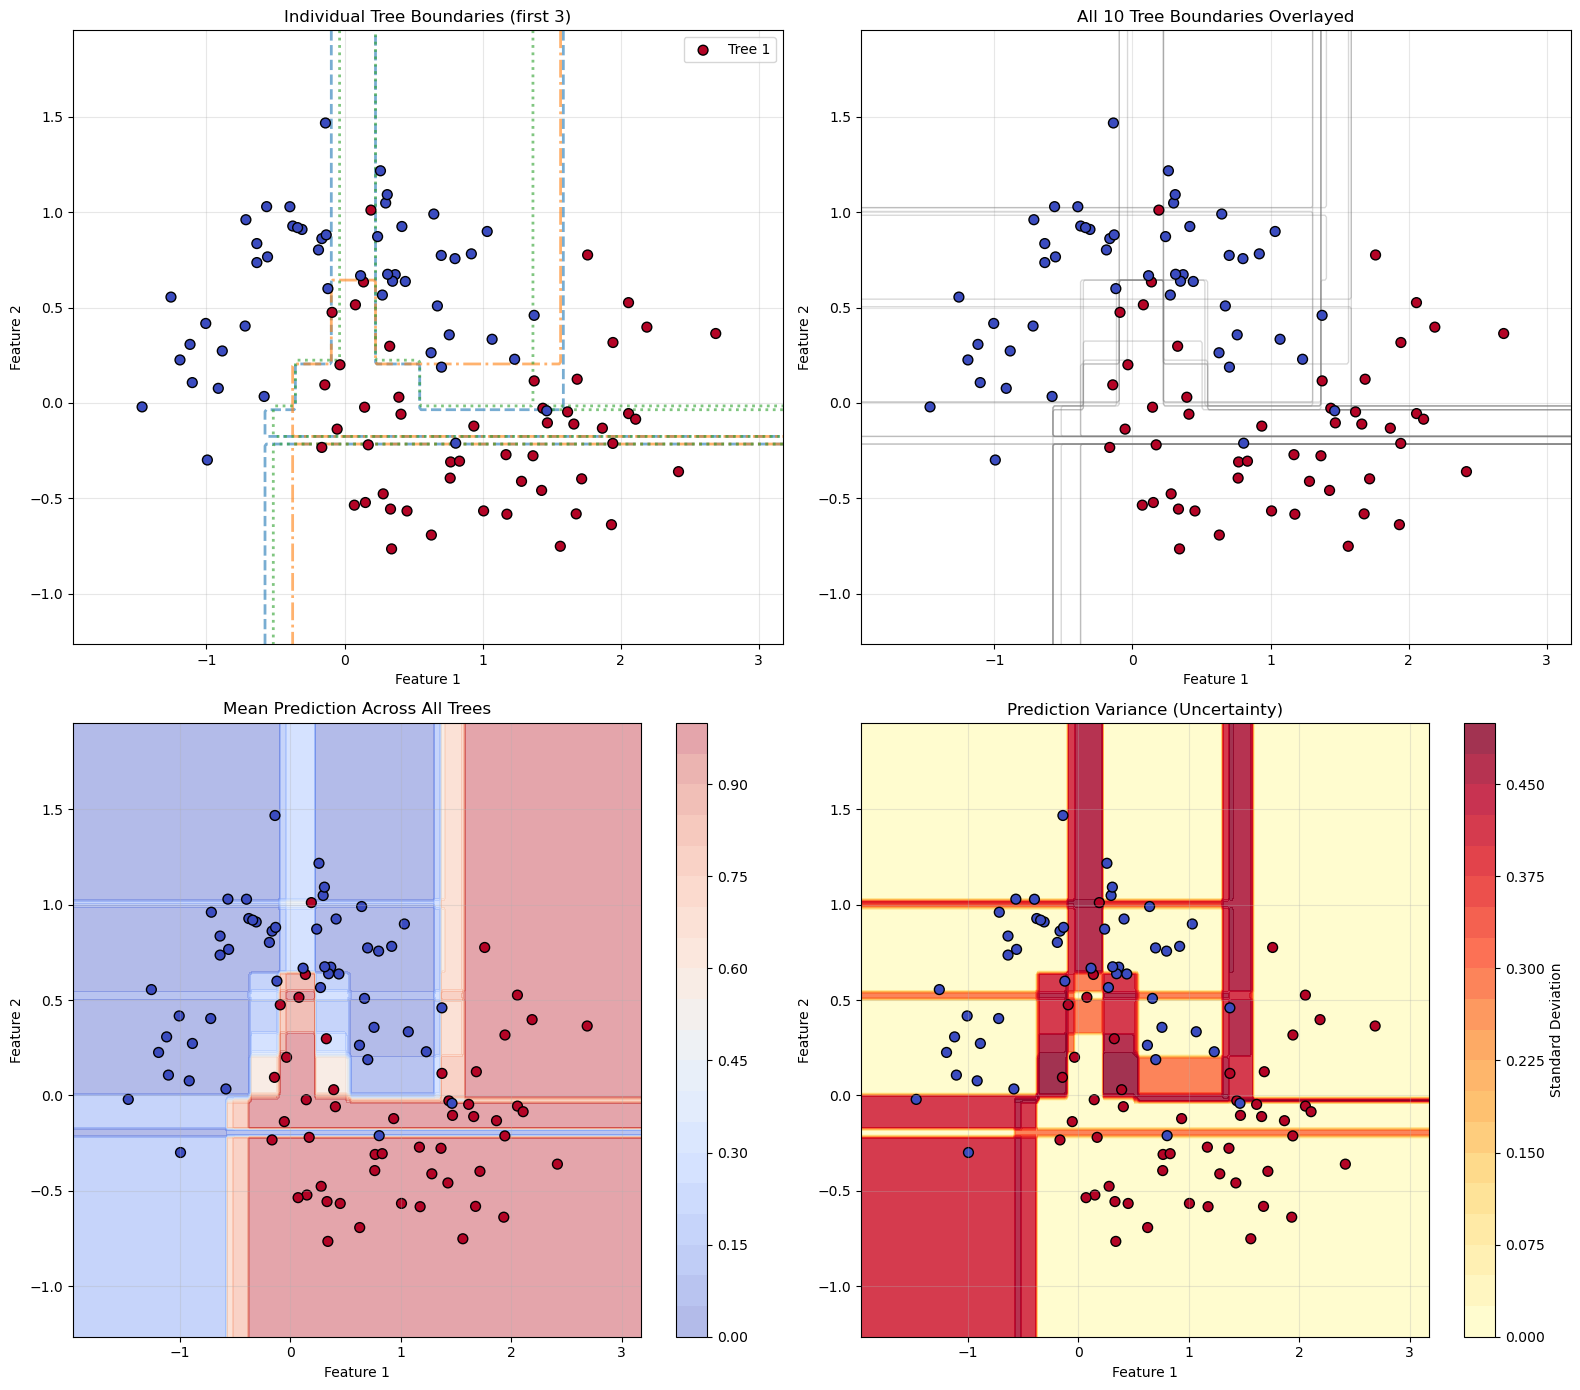

In [55]:
# Generate a dataset
X_variance, y_variance = make_moons(n_samples=100, noise=0.25, random_state=42)

# Train multiple trees with different train/test splits
n_trees = 10
trees_variance = []
predictions_grid = []

print(f"Training {n_trees} Decision Trees with different data splits...")
print()

for i in range(n_trees):
    # Different random split each time
    X_train_var, X_test_var, y_train_var, y_test_var = train_test_split(
        X_variance, y_variance, test_size=0.2, random_state=i
    )
    
    # Train tree
    dt = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt.fit(X_train_var, y_train_var)
    
    # Evaluate
    train_acc = accuracy_score(y_train_var, dt.predict(X_train_var))
    test_acc = accuracy_score(y_test_var, dt.predict(X_test_var))
    
    trees_variance.append(dt)
    
    print(f"Tree {i+1}: Train Acc={train_acc:.3f}, Test Acc={test_acc:.3f}")

print("\nOVERLAYING DECISION BOUNDARIES")

# Create mesh for predictions
h = 0.02
x_min, x_max = X_variance[:, 0].min() - 0.5, X_variance[:, 0].max() + 0.5
y_min, y_max = X_variance[:, 1].min() - 0.5, X_variance[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Get predictions from all trees
all_predictions = []
for tree in trees_variance:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    all_predictions.append(Z)

# Calculate variance in predictions
all_predictions = np.array(all_predictions)
mean_prediction = np.mean(all_predictions, axis=0)
std_prediction = np.std(all_predictions, axis=0)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot 1: Show first 3 individual trees
ax = axes[0, 0]
for i in range(min(3, n_trees)):
    ax.contour(xx, yy, all_predictions[i], levels=[0.5], 
              colors=[plt.cm.tab10(i)], linewidths=2, alpha=0.6,
              linestyles=['--', '-.', ':'][i])
ax.scatter(X_variance[:, 0], X_variance[:, 1], c=y_variance, 
          cmap='coolwarm', edgecolor='k', s=50, zorder=10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Individual Tree Boundaries (first 3)')
ax.grid(True, alpha=0.3)
ax.legend(['Tree 1', 'Tree 2', 'Tree 3', 'Data'], loc='best')

# Plot 2: Show all boundaries overlayed
ax = axes[0, 1]
for i in range(n_trees):
    ax.contour(xx, yy, all_predictions[i], levels=[0.5], 
              colors='gray', linewidths=1, alpha=0.3)
ax.scatter(X_variance[:, 0], X_variance[:, 1], c=y_variance, 
          cmap='coolwarm', edgecolor='k', s=50, zorder=10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title(f'All {n_trees} Tree Boundaries Overlayed')
ax.grid(True, alpha=0.3)

# Plot 3: Mean prediction (ensemble-like)
ax = axes[1, 0]
contour = ax.contourf(xx, yy, mean_prediction, alpha=0.4, cmap='coolwarm', levels=20)
ax.scatter(X_variance[:, 0], X_variance[:, 1], c=y_variance, 
          cmap='coolwarm', edgecolor='k', s=50)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Mean Prediction Across All Trees')
ax.grid(True, alpha=0.3)
plt.colorbar(contour, ax=ax)

# Plot 4: Variance/uncertainty map
ax = axes[1, 1]
contour = ax.contourf(xx, yy, std_prediction, alpha=0.8, cmap='YlOrRd', levels=20)
ax.scatter(X_variance[:, 0], X_variance[:, 1], c=y_variance, 
          cmap='coolwarm', edgecolor='k', s=50)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Prediction Variance (Uncertainty)')
ax.grid(True, alpha=0.3)
plt.colorbar(contour, ax=ax, label='Standard Deviation')

plt.tight_layout()
plt.show()